# Lab 9 (3/16): MLB Data

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu

In [1]:
require(tidyverse)
require(stringr)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## `pivot_longer` and `pivot_wider` review

Remember that `pivot_longer` transforms datasets from "wide" to "long," collecting different column names into a variable. `pivot_wider` does the opposite, turning "long" datasets into "wide" ones by spreading out a variable's values into several columns

In [2]:
grades_wide = tribble(
  ~student,  ~`2015`, ~`2016`, ~`2017`,
'Roger',       83,      89,      93,
  'Jon',       92,      90,      93)
grades_wide

student,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>
Roger,83,89,93
Jon,92,90,93


In [3]:
grades_long = grades_wide %>% 
    pivot_longer(
        `2015`:`2017`,     # Columns with data values
        names_to="year",   # New variable name in the wide data to store the names
        values_to="grade"  # New variable name in the wide data to store the values
    )

grades_long

student,year,grade
<chr>,<chr>,<dbl>
Roger,2015,83
Roger,2016,89
Roger,2017,93
Jon,2015,92
Jon,2016,90
Jon,2017,93


In [19]:
grades_long %>% 
    pivot_wider(
        names_from=year,   # Variable from the long data where names are contained
        values_from=grade  # Variable from the long data where values are contained
    )

student,2015,2016,2017
<chr>,<dbl>,<dbl>,<dbl>
Roger,83,89,93
Jon,92,90,93


### `unite` and `separate`

These are used to combine the information from two variables into one variable, or separate information in that format. These are often useful when cleaning data, but can also be useful when doing some data transformations.

In [7]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [8]:
table3 %>% separate(rate, into=c('cases', 'pop'))

country,year,cases,pop
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [9]:
# Note that the new variables are still string variables in the above
# example. To convert them automatically, use the convert argument.
table3 %>% separate(rate, into=c('cases', 'pop'), convert=TRUE)

country,year,cases,pop
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


`unite` does the opposite, and can be useful for some data manipulations. It is also often used to create unique identification variables, for instance by combining state and district number or similar hierarchical identifiers.

In [11]:
voting <- tribble(
  ~year,  ~gender,  ~age, ~percentage,
    2018,  'm', 1824, 27.4,
    2018,  'f', 1824, 32.8,
    2018,  'm', 2544, 38.0,
    2018,  'f', 2544, 42.9,
    2014,  'm', 1824, 14.7,
    2014,  'f', 1824, 17.2,
    2014,  'm', 2544, 26.3,
    2014,  'f', 2544, 30.4,
)

voting

year,gender,age,percentage
<dbl>,<chr>,<dbl>,<dbl>
2018,m,1824,27.4
2018,f,1824,32.8
2018,m,2544,38.0
2018,f,2544,42.9
2014,m,1824,14.7
2014,f,1824,17.2
2014,m,2544,26.3
2014,f,2544,30.4


In [21]:
voting %>% pivot_wider(names_from=c('gender', 'age'), values_from='percentage')

voting %>% unite(gender_age, gender, age) %>%
    pivot_wider(names_from=gender_age, values_from=percentage)


year,m_1824,f_1824,m_2544,f_2544
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,27.4,32.8,38.0,42.9
2014,14.7,17.2,26.3,30.4


year,gender_age,percentage
<dbl>,<chr>,<dbl>
2018,m_1824,27.4
2018,f_1824,32.8
2018,m_2544,38.0
2018,f_2544,42.9
2014,m_1824,14.7
2014,f_1824,17.2
2014,m_2544,26.3
2014,f_2544,30.4


## MLB Data

This dataset contains information for player-seasons in the American League from 2015 to 2018. For those unfamiliar with baseball:
* `PA`: Plate Appearances, the number of times a player came up to bat.
* `HR`: number of home runs.
* `BB`: The number of walks.
* `BBrate`: The number of walks as a percentage of plate appearances (BB/PA).
* `K`: The number of strikeouts.
* `AVG`: A batters batting average.
* `FB`: The number of fly balls a batter hit.

Note: Also recall the functions [`unite`](https://tidyr.tidyverse.org/reference/unite.html), [`separate`](https://tidyr.tidyverse.org/reference/separate.html), and [`complete`](https://tidyr.tidyverse.org/reference/complete.html).

In [22]:
mlb = read_csv('https://raw.githubusercontent.com/rogerfan/stats306_f18_labs/master/mlb.csv')
head(mlb)

Parsed with column specification:
cols(
  year = col_double(),
  name = col_character(),
  team = col_character(),
  division = col_character(),
  PA = col_double(),
  HR = col_double(),
  BBrate = col_character(),
  BB_K = col_character(),
  AVG = col_double(),
  FB = col_double(),
  playerid = col_double()
)



year,name,team,division,PA,HR,BBrate,BB_K,AVG,FB,playerid
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2016,Abraham Almonte,Indians,Central,194,1,4.1 %,8/42,0.264,43,5486
2017,Abraham Almonte,Indians,Central,195,3,10.3 %,20/46,0.233,34,5486
2015,Adam Moore,Indians,Central,4,0,0.0 %,0/2,0.250,1,9362
2016,Adam Moore,Indians,Central,5,0,0.0 %,0/4,0.000,1,9362
2018,Adam Plutko,Indians,Central,2,0,0.0 %,0/0,0.000,0,15846
2018,Adam Rosales,Indians,Central,21,1,4.8 %,1/5,0.211,7,9682


### Problem 1

Note that `BBrate` and `BB_K` were read in as strings. Clean up these variables and convert them to numeric variables, noting that `BB_K` should be two integer variables named `BB` and `K`. For `BBrate`, recall the function `str_replace` ([documentation](https://stringr.tidyverse.org/reference/str_replace.html)).

In [23]:
dat1 = mlb %>% mutate(BBrate = as.numeric(str_replace(BBrate, ' %', ''))/100) %>%
    separate(BB_K, into = c("BB", "K"), sep="/", convert=TRUE)
head(dat1)

year,name,team,division,PA,HR,BBrate,BB,K,AVG,FB,playerid
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
2016,Abraham Almonte,Indians,Central,194,1,0.041,8,42,0.264,43,5486
2017,Abraham Almonte,Indians,Central,195,3,0.103,20,46,0.233,34,5486
2015,Adam Moore,Indians,Central,4,0,0.000,0,2,0.250,1,9362
2016,Adam Moore,Indians,Central,5,0,0.000,0,4,0.000,1,9362
2018,Adam Plutko,Indians,Central,2,0,0.000,0,0,0.000,0,15846
2018,Adam Rosales,Indians,Central,21,1,0.048,1,5,0.211,7,9682


### Problem 2

Calculate the HR per FB rate for each team and year. Convert this to a wide dataset, so your variables should be `division`, `team`, and `2015`-`2018`, where values are the HR/FB rate. Note that you should ensure that `division` is still in the dataset.

Create a variable called `increased`, which checks if the HR/FB rate was higher in 2018 than it was in 2015 for that team.

In [25]:
dat2 = mlb %>% 
    group_by(division, team, year) %>% 
    summarize(HR_FB=sum(HR)/sum(FB))%>%
    pivot_wider(names_from=year, values_from=HR_FB) %>% 
    mutate(increased = `2018` > `2015`)

head(dat2)

division,team,2015,2016,2017,2018,increased
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Central,Indians,0.09964727,0.1198402,0.1314103,0.12936849,TRUE
Central,Royals,0.08997253,0.1041215,0.1225681,0.10319635,TRUE
Central,Tigers,0.09611152,0.1376147,0.1077051,0.09244314,FALSE
Central,Twins,0.10641201,0.1308677,0.1312420,0.09869494,FALSE
Central,White_Sox,0.10594947,0.1220799,0.1352785,0.13573620,TRUE
East,Blue_Jays,0.16168582,0.1460446,0.1417910,0.13721264,FALSE


Turn this back into a "long" dataset. Make sure you *do not* treat the `increased` variable as a values column, so the final dataset should have the variables `division`, `team`, `increased`, `year`, and `HR_FB`. Create a plot of HR/FB rate on year. Color it by `team`, facet it by `division`, and choose the linetype according to the `increased` variable.

division,team,increased,year,HR_FB
<chr>,<chr>,<lgl>,<chr>,<dbl>
Central,Indians,TRUE,2015,0.09964727
Central,Indians,TRUE,2016,0.11984021
Central,Indians,TRUE,2017,0.13141026
Central,Indians,TRUE,2018,0.12936849
Central,Royals,TRUE,2015,0.08997253
Central,Royals,TRUE,2016,0.10412148


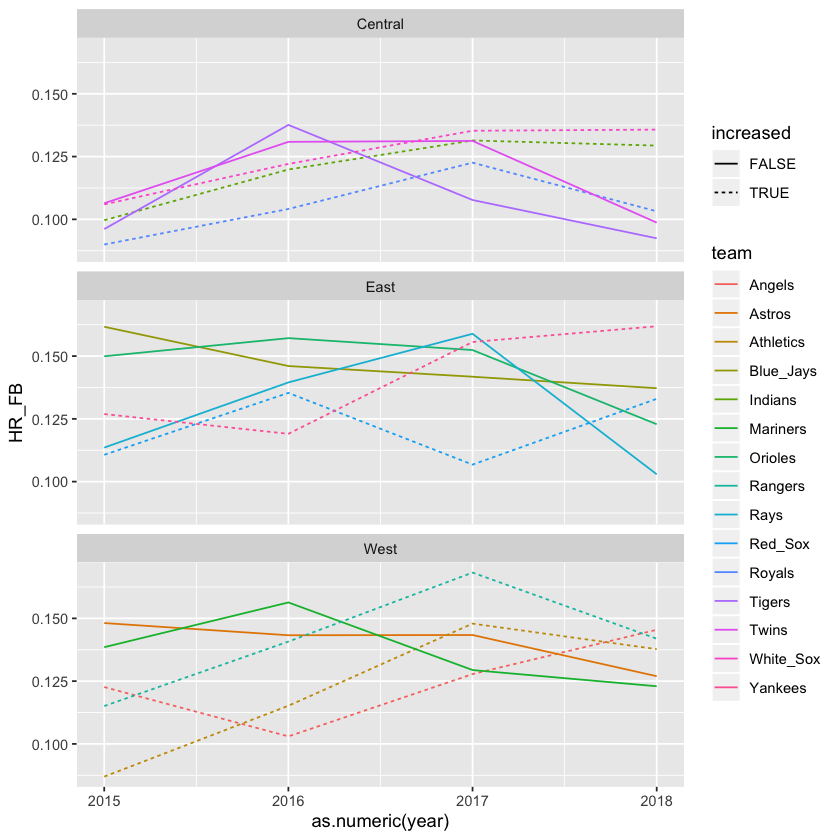

In [29]:
dat2b = dat2 %>% pivot_longer(`2015`:`2018`, names_to='year', values_to='HR_FB')

head(dat2b)

ggplot(dat2b, aes(color=team, linetype=increased, x=as.numeric(year), y=HR_FB)) + 
    geom_line() +
    facet_wrap(~ division, nrow=3)

### Problem 3

Go back to `mlb` and calculate total HRs and PAs per year per team. Create a wide version of this dataset. So there should be a `team` variable, then eight variables tracking values: `HR_2015`, `HR_2016`, `HR_2017`, `HR_2018`, `PA_2015`, `PA_2016`, `PA_2017`, and `PA_2018`.

Hint: Once you calculate the summary statistics you can use a `pivot_longer`, `unite`, and `pivot_wider` (noting that you can combine the `unite` operation into the `pivot_wider` command) in that order to create the wide version.

In [42]:
dat3 = mlb %>% group_by(team, year) %>% summarize(HR=sum(HR), PA=sum(PA)) %>%
    pivot_longer(c(HR, PA), names_to='variable', values_to='value') %>%
    pivot_wider(names_from=c(variable, year), values_from=value)

head(dat3)

team,HR_2015,PA_2015,HR_2016,PA_2016,HR_2017,PA_2017,HR_2018,PA_2018
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angels,169,5519,155,5901,165,5178,192,5336
Astros,224,5866,193,5851,232,5984,201,5997
Athletics,124,5573,138,4487,188,4687,227,6248
Blue_Jays,211,5196,216,6015,209,5842,191,5313
Indians,113,4758,180,5896,205,6051,211,6219
Mariners,169,5002,220,6079,190,5789,166,5609


### Problem 4

The following code creates a dataset containing for each player the change in AVG from the previous season to the current season, as well as the change from the current season to the next season.

In [58]:
dat4 = mlb %>% filter(PA >= 200) %>%
    group_by(playerid) %>%
    arrange(playerid, year) %>%
    mutate(AVG_change = AVG - lag(AVG),
           next_AVG_change = lead(AVG) - AVG) %>%
    filter(!is.na(AVG)) %>%
    select(year:division, playerid, AVG:next_AVG_change)

head(dat4, 10)

year,name,team,division,playerid,AVG,FB,AVG_change,next_AVG_change
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,Victor Martinez,Tigers,Central,393,0.245,153,NA,0.044
2016,Victor Martinez,Tigers,Central,393,0.289,183,0.044,-0.034
2017,Victor Martinez,Tigers,Central,393,0.255,113,-0.034,-0.004
2018,Victor Martinez,Tigers,Central,393,0.251,153,-0.004,NA
2016,Juan Uribe,Indians,Central,454,0.206,66,NA,NA
2015,Carlos Beltran,Yankees,East,589,0.276,171,NA,-0.045
2017,Carlos Beltran,Astros,West,589,0.231,150,-0.045,NA
2015,Adrian Beltre,Rangers,West,639,0.287,182,NA,0.013
2016,Adrian Beltre,Rangers,West,639,0.300,219,0.013,0.012


Using this data, make two scatterplots where the `x`-axis is the current AVG and the `y`-axis is each of these change variables. Only use a single plotting command and facetting to accomplish this. What conclusions can you draw from these plots?

HINT: You will first need to do an additional data transformation involving a pivot.

Warning message:
“Removed 594 rows containing missing values (geom_point).”


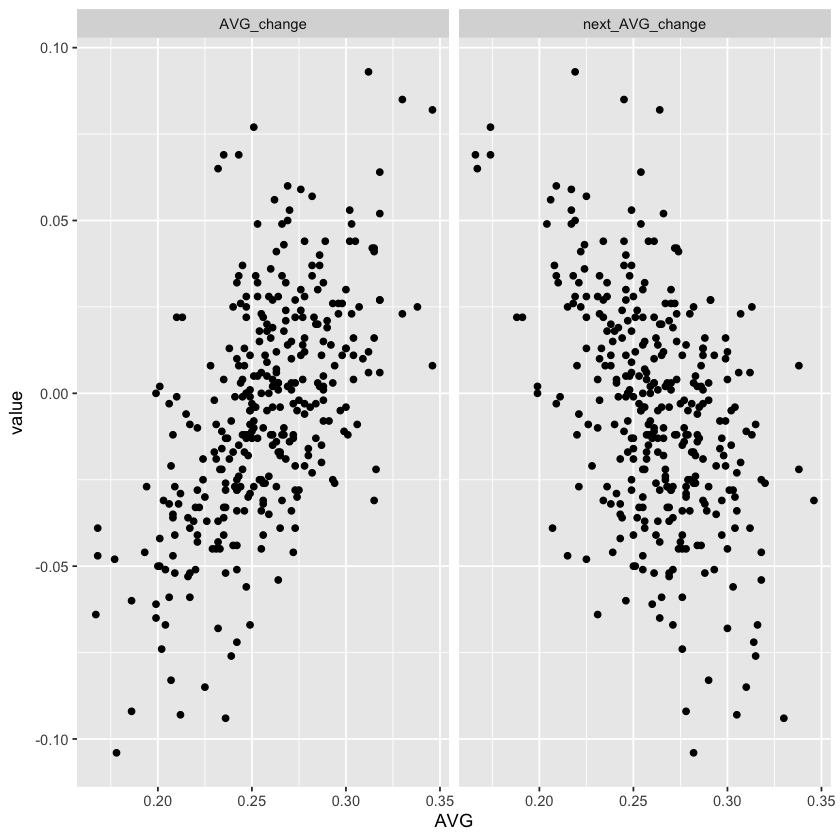

In [61]:
dat4b = dat4 %>% pivot_longer(c(AVG_change, next_AVG_change), names_to='variable', values_to='value')

ggplot(dat4b, aes(x=AVG, y=value)) + 
    geom_point() + 
    facet_wrap(~variable)